In [1]:
import import_ipynb
import common.functions as fun
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale
import os

importing Jupyter notebook from /mnt/DANE/Dokumenty/Informatyka/Projekty/optimal-egc/Notebooks/common/functions.ipynb
importing Jupyter notebook from /mnt/DANE/Dokumenty/Informatyka/Projekty/optimal-egc/Notebooks/common/SGC.ipynb


In [2]:
np.set_printoptions(precision=5, suppress=True)

In [3]:
#taken from: https://stackoverflow.com/questions/10035752/elegant-python-code-for-integer-partitioning
def partitions(n, I=1):
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p

In [4]:
eksamplOrder=["".join(i) for i in itertools.product(['A','C','G','T'],repeat=3)]

In [5]:
#thanks to "1000000" we have indeksing from 1
kSizeCond=np.array([1000000]+[fun.calculateBlockConductance(set(eksamplOrder[:i])) for i in range(1,37)])

In [6]:
exampleOptimalPartition={}
for p in partitions(36):
    sumOfCond=0
    n=len(p)
    for k in p:
        sumOfCond+=kSizeCond[k]
    avgCond=sumOfCond/n
    if n in exampleOptimalPartition:
        if exampleOptimalPartition[n][0]>avgCond:
            exampleOptimalPartition[n]=(avgCond,p)
    else:
        exampleOptimalPartition[n]=(avgCond,p)

In [7]:
exampleOptimalPartition

{1: (0.2222222222222222, (36,)),
 2: (0.34444444444444444, (16, 20)),
 3: (0.4444444444444444, (4, 16, 16)),
 4: (0.5277777777777778, (4, 4, 12, 16)),
 5: (0.5777777777777777, (4, 4, 4, 8, 16)),
 6: (0.611111111111111, (4, 4, 4, 4, 4, 16)),
 7: (0.6349206349206348, (4, 4, 4, 4, 4, 4, 12)),
 8: (0.6527777777777777, (4, 4, 4, 4, 4, 4, 4, 8)),
 9: (0.6666666666666666, (4, 4, 4, 4, 4, 4, 4, 4, 4)),
 10: (0.7111111111111111, (1, 3, 4, 4, 4, 4, 4, 4, 4, 4)),
 11: (0.7474747474747475, (1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4)),
 12: (0.7777777777777777, (1, 1, 1, 3, 3, 3, 4, 4, 4, 4, 4, 4)),
 13: (0.8034188034188031, (1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4)),
 14: (0.8253968253968251, (1, 1, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4)),
 15: (0.8444444444444442, (1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4)),
 16: (0.8611111111111109, (1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 4, 4, 4)),
 17: (0.8758169934640521, (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 4)),
 18: (0.8888888888888887,
  (1, 1, 1, 1, 1, 1,

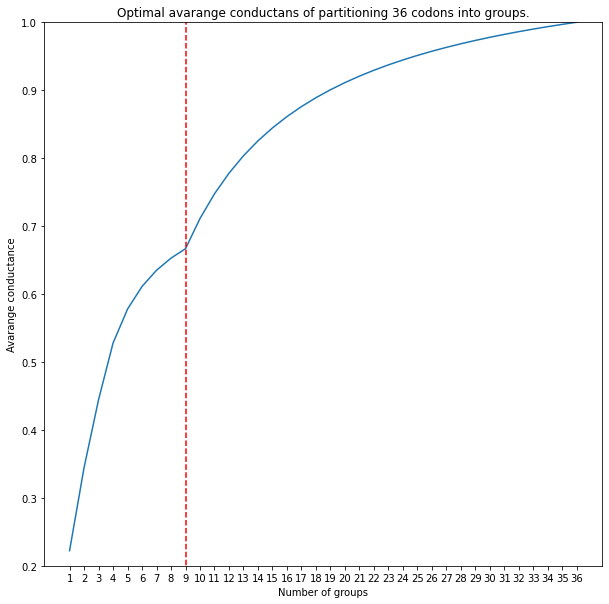

In [8]:
plt.gcf().set_size_inches(10,10)
plt.title("Optimal avarange conductans of partitioning 36 codons into groups.")
plt.ylabel("Avarange conductance")
plt.xlabel("Number of groups")
plt.xticks(range(1,37))
plt.ylim((0.2,1))
plt.plot(range(1,37),[exampleOptimalPartition[i][0] for i in range(1,37)])
plt.plot([9,9],[0,1],"r--")
plt.savefig("../Obrazy/partitioningOf36Codons.pdf",dpi=1000)

In [9]:
for i in range(1,len(kSizeCond)//2+1):
    print(i,"&","{: f}".format(kSizeCond[i]),"&",i+18,"&","{: f}".format(kSizeCond[i+18]),r"\\")

1 &  1.000000 & 19 &  0.368421 \\
2 &  0.888889 & 20 &  0.355556 \\
3 &  0.777778 & 21 &  0.365079 \\
4 &  0.666667 & 22 &  0.363636 \\
5 &  0.688889 & 23 &  0.352657 \\
6 &  0.666667 & 24 &  0.333333 \\
7 &  0.619048 & 25 &  0.333333 \\
8 &  0.555556 & 26 &  0.324786 \\
9 &  0.555556 & 27 &  0.308642 \\
10 &  0.533333 & 28 &  0.285714 \\
11 &  0.494949 & 29 &  0.279693 \\
12 &  0.444444 & 30 &  0.266667 \\
13 &  0.435897 & 31 &  0.247312 \\
14 &  0.412698 & 32 &  0.222222 \\
15 &  0.377778 & 33 &  0.232323 \\
16 &  0.333333 & 34 &  0.235294 \\
17 &  0.359477 & 35 &  0.231746 \\
18 &  0.370370 & 36 &  0.222222 \\


In [10]:
"{: f}".format(kSizeCond[i])

' 0.370370'

In [11]:
kSizeCond

array([1000000.     ,       1.     ,       0.88889,       0.77778,
             0.66667,       0.68889,       0.66667,       0.61905,
             0.55556,       0.55556,       0.53333,       0.49495,
             0.44444,       0.4359 ,       0.4127 ,       0.37778,
             0.33333,       0.35948,       0.37037,       0.36842,
             0.35556,       0.36508,       0.36364,       0.35266,
             0.33333,       0.33333,       0.32479,       0.30864,
             0.28571,       0.27969,       0.26667,       0.24731,
             0.22222,       0.23232,       0.23529,       0.23175,
             0.22222])

$\phi$

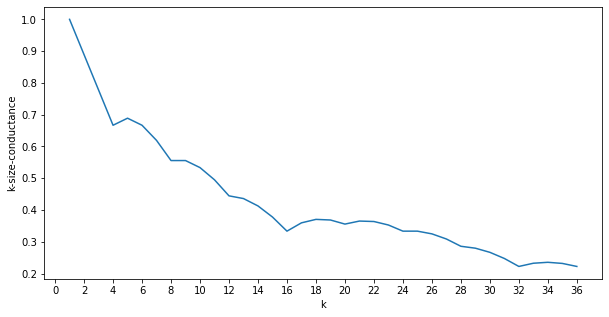

In [12]:
plt.gcf().set_size_inches(10,5)
plt.ylabel("k-size-conductance")
plt.xlabel("k")
plt.xticks(np.arange(0,37,2))
plt.plot(np.arange(1,37),kSizeCond[1:])
plt.savefig("../Obrazy/k-size-conductance.pdf",dpi=1000)

In [13]:
allOptimalPartition={}
for p in partitions(36):
    sumOfCond=0
    n=len(p)
    for k in p:
        sumOfCond+=kSizeCond[k]
    avgCond=sumOfCond/n
    if n in allOptimalPartition:
        if allOptimalPartition[n][0][0]>avgCond:
            allOptimalPartition[n]=[(avgCond,p)]
        elif allOptimalPartition[n][0][0]==avgCond:
            allOptimalPartition[n].append((avgCond,p))
    else:
        allOptimalPartition[n]=[(avgCond,p)]

In [14]:
allOptimalPartition

{1: [(0.2222222222222222, (36,))],
 2: [(0.34444444444444444, (16, 20))],
 3: [(0.4444444444444444, (4, 16, 16)),
  (0.4444444444444444, (8, 12, 16)),
  (0.4444444444444444, (12, 12, 12))],
 4: [(0.5277777777777778, (4, 4, 12, 16)),
  (0.5277777777777778, (4, 8, 8, 16)),
  (0.5277777777777778, (4, 8, 12, 12)),
  (0.5277777777777778, (8, 8, 8, 12))],
 5: [(0.5777777777777777, (4, 4, 4, 8, 16))],
 6: [(0.611111111111111, (4, 4, 4, 4, 4, 16)),
  (0.611111111111111, (4, 4, 4, 8, 8, 8))],
 7: [(0.6349206349206348, (4, 4, 4, 4, 4, 4, 12)),
  (0.6349206349206348, (4, 4, 4, 4, 4, 8, 8))],
 8: [(0.6527777777777777, (4, 4, 4, 4, 4, 4, 4, 8))],
 9: [(0.6666666666666666, (4, 4, 4, 4, 4, 4, 4, 4, 4))],
 10: [(0.7111111111111111, (1, 3, 4, 4, 4, 4, 4, 4, 4, 4)),
  (0.7111111111111111, (2, 2, 4, 4, 4, 4, 4, 4, 4, 4)),
  (0.7111111111111111, (2, 3, 3, 4, 4, 4, 4, 4, 4, 4))],
 11: [(0.7474747474747475, (1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4)),
  (0.7474747474747475, (1, 1, 3, 3, 4, 4, 4, 4, 4, 4, 4)),
  (0.7

In [15]:
for i in range(1,37):
    print(r"\hline")
    print(i,"&","{: f}".format(allOptimalPartition[i][0][0]),"&", r"\parbox[t]{10cm}{", end="")
    for partition in allOptimalPartition[i]:
        print(partition[1],r"\\")
    print(r"}\\")
print(r"\hline")

\hline
1 &  0.222222 & \parbox[t]{10cm}{(36,) \\
}\\
\hline
2 &  0.344444 & \parbox[t]{10cm}{(16, 20) \\
}\\
\hline
3 &  0.444444 & \parbox[t]{10cm}{(4, 16, 16) \\
(8, 12, 16) \\
(12, 12, 12) \\
}\\
\hline
4 &  0.527778 & \parbox[t]{10cm}{(4, 4, 12, 16) \\
(4, 8, 8, 16) \\
(4, 8, 12, 12) \\
(8, 8, 8, 12) \\
}\\
\hline
5 &  0.577778 & \parbox[t]{10cm}{(4, 4, 4, 8, 16) \\
}\\
\hline
6 &  0.611111 & \parbox[t]{10cm}{(4, 4, 4, 4, 4, 16) \\
(4, 4, 4, 8, 8, 8) \\
}\\
\hline
7 &  0.634921 & \parbox[t]{10cm}{(4, 4, 4, 4, 4, 4, 12) \\
(4, 4, 4, 4, 4, 8, 8) \\
}\\
\hline
8 &  0.652778 & \parbox[t]{10cm}{(4, 4, 4, 4, 4, 4, 4, 8) \\
}\\
\hline
9 &  0.666667 & \parbox[t]{10cm}{(4, 4, 4, 4, 4, 4, 4, 4, 4) \\
}\\
\hline
10 &  0.711111 & \parbox[t]{10cm}{(1, 3, 4, 4, 4, 4, 4, 4, 4, 4) \\
(2, 2, 4, 4, 4, 4, 4, 4, 4, 4) \\
(2, 3, 3, 4, 4, 4, 4, 4, 4, 4) \\
}\\
\hline
11 &  0.747475 & \parbox[t]{10cm}{(1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4) \\
(1, 1, 3, 3, 4, 4, 4, 4, 4, 4, 4) \\
(1, 2, 2, 3, 4, 4, 4, 4, 4, 4,

### Plots for $C_k \quad k \in [28,...,64]$

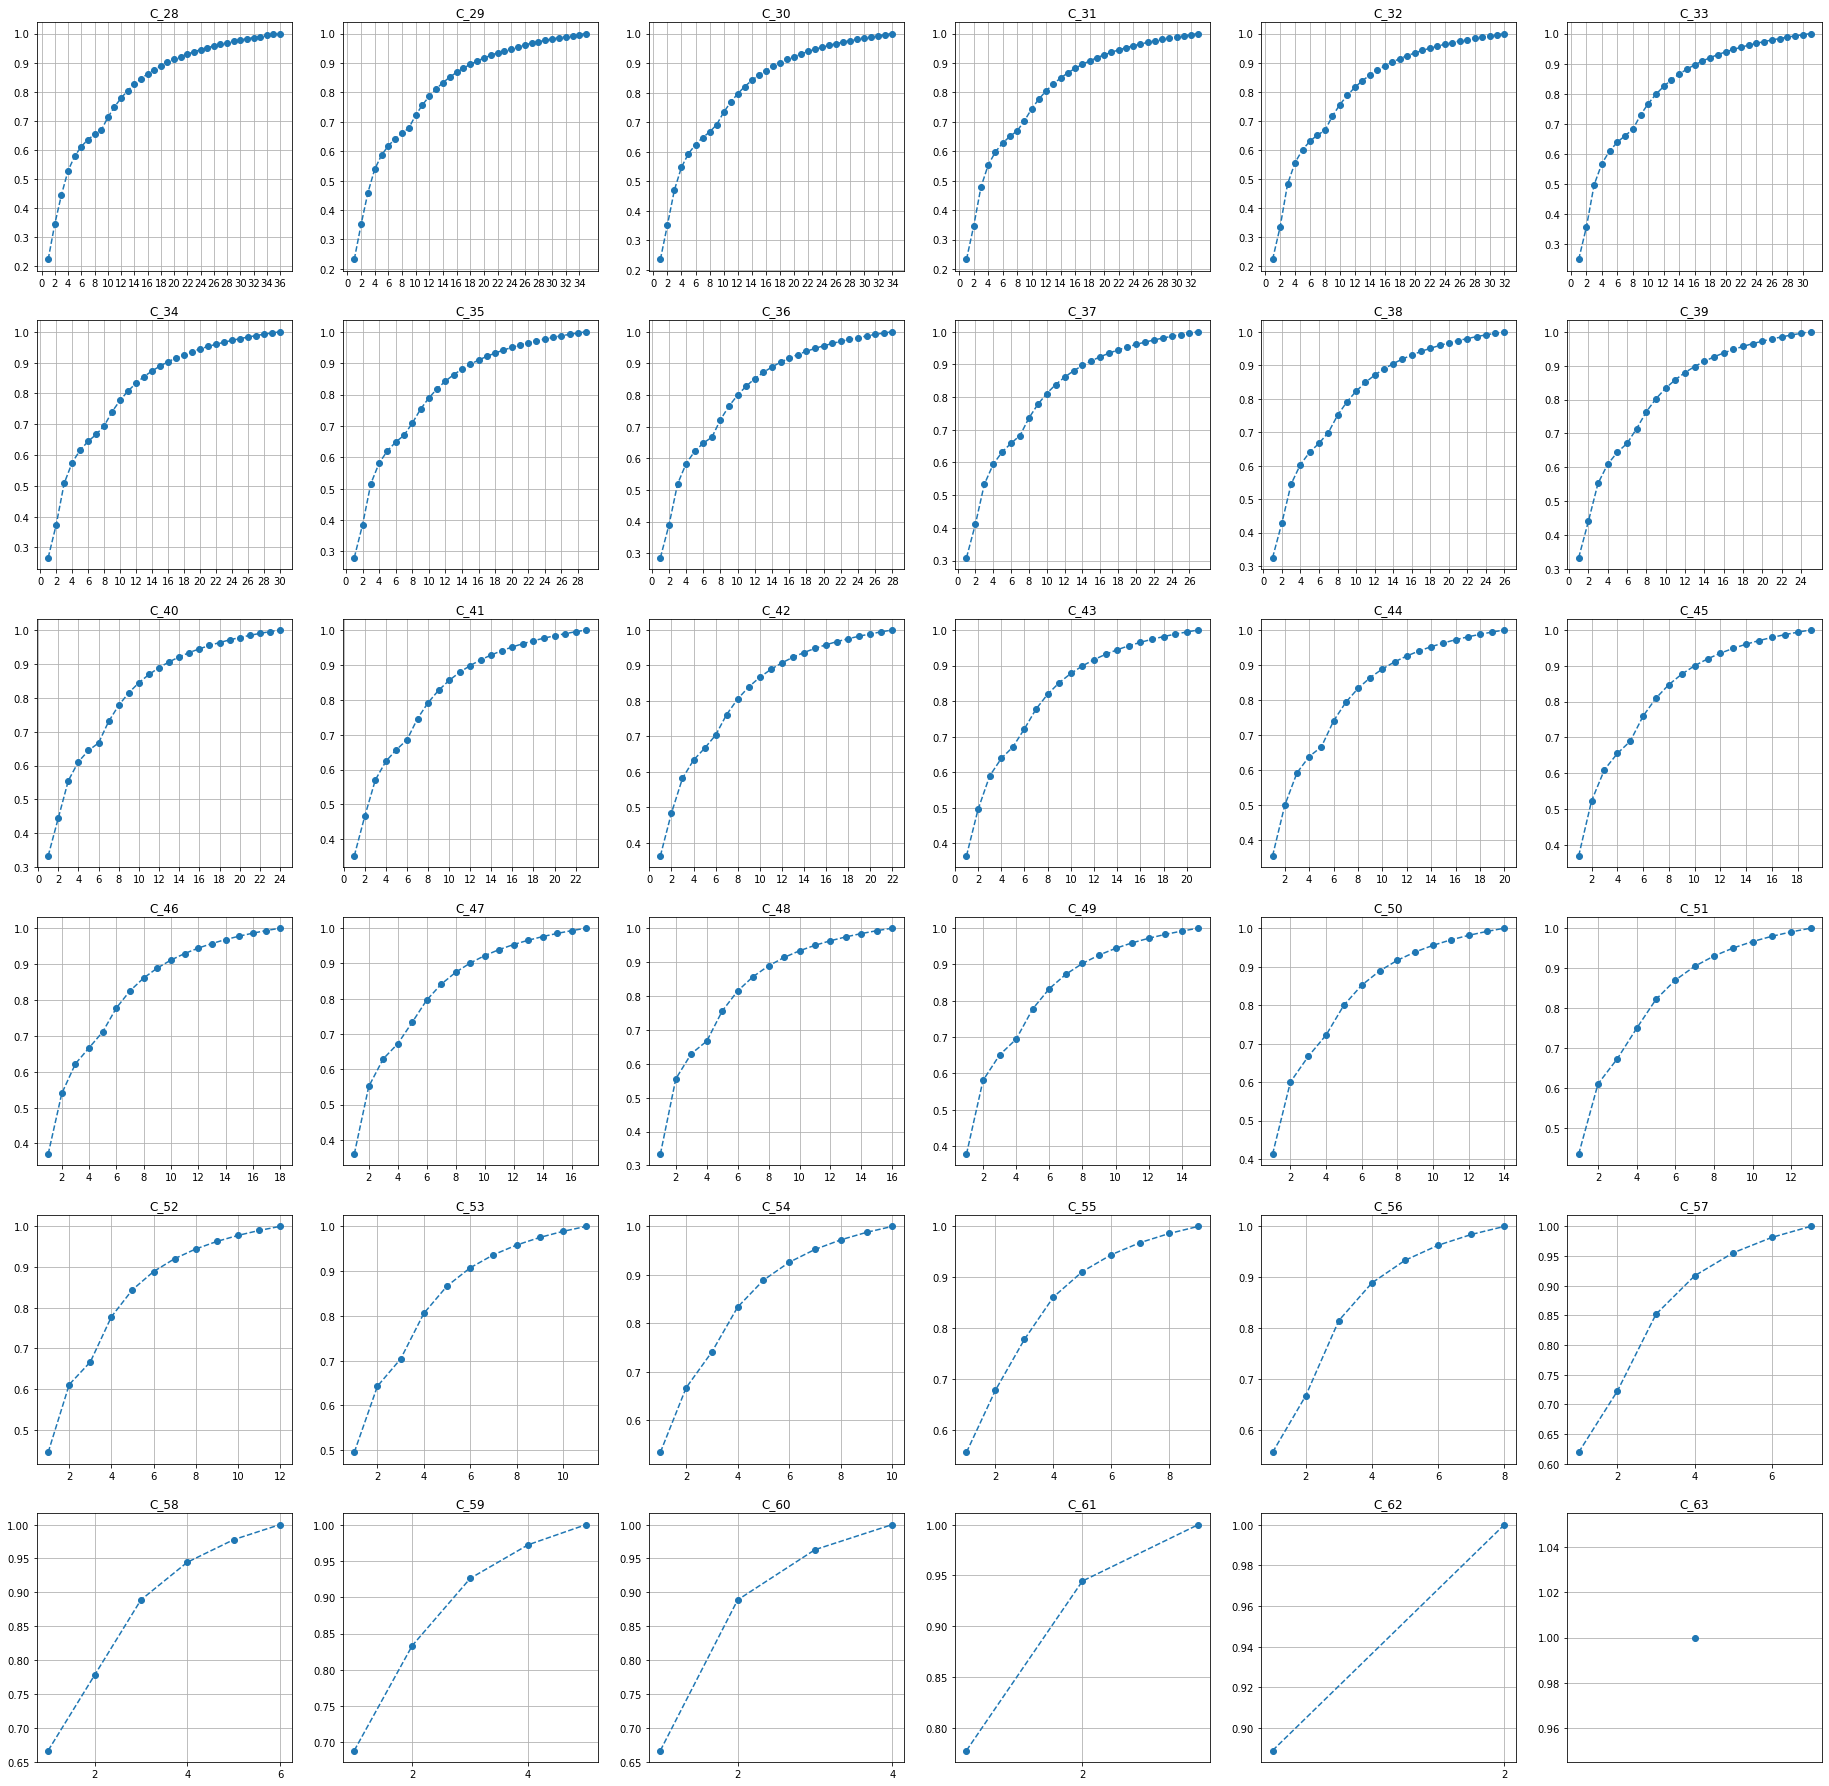

<Figure size 432x288 with 0 Axes>

In [16]:
plt.gcf().set_size_inches(32,32)
for k in range(28,64):
    plt.subplot(6,6,k-27)
    partition={}
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        if n in partition:
            if partition[n][0]>avgCond:
                partition[n]=(avgCond,p)
        else:
            partition[n]=(avgCond,p)
    plt.title("C_"+str(k))
    plt.grid(True)
    plt.xticks(range(0,65-k,2))
    plt.plot(range(1,65-k),[partition[i][0] for i in range(1,65-k)],'o--')
plt.show()
plt.savefig("../Obrazy/avgCondForAllCprim.pdf",dpi=1000)

### Plots with balance $ C_k \quad \text{for } k \in [28,64]$

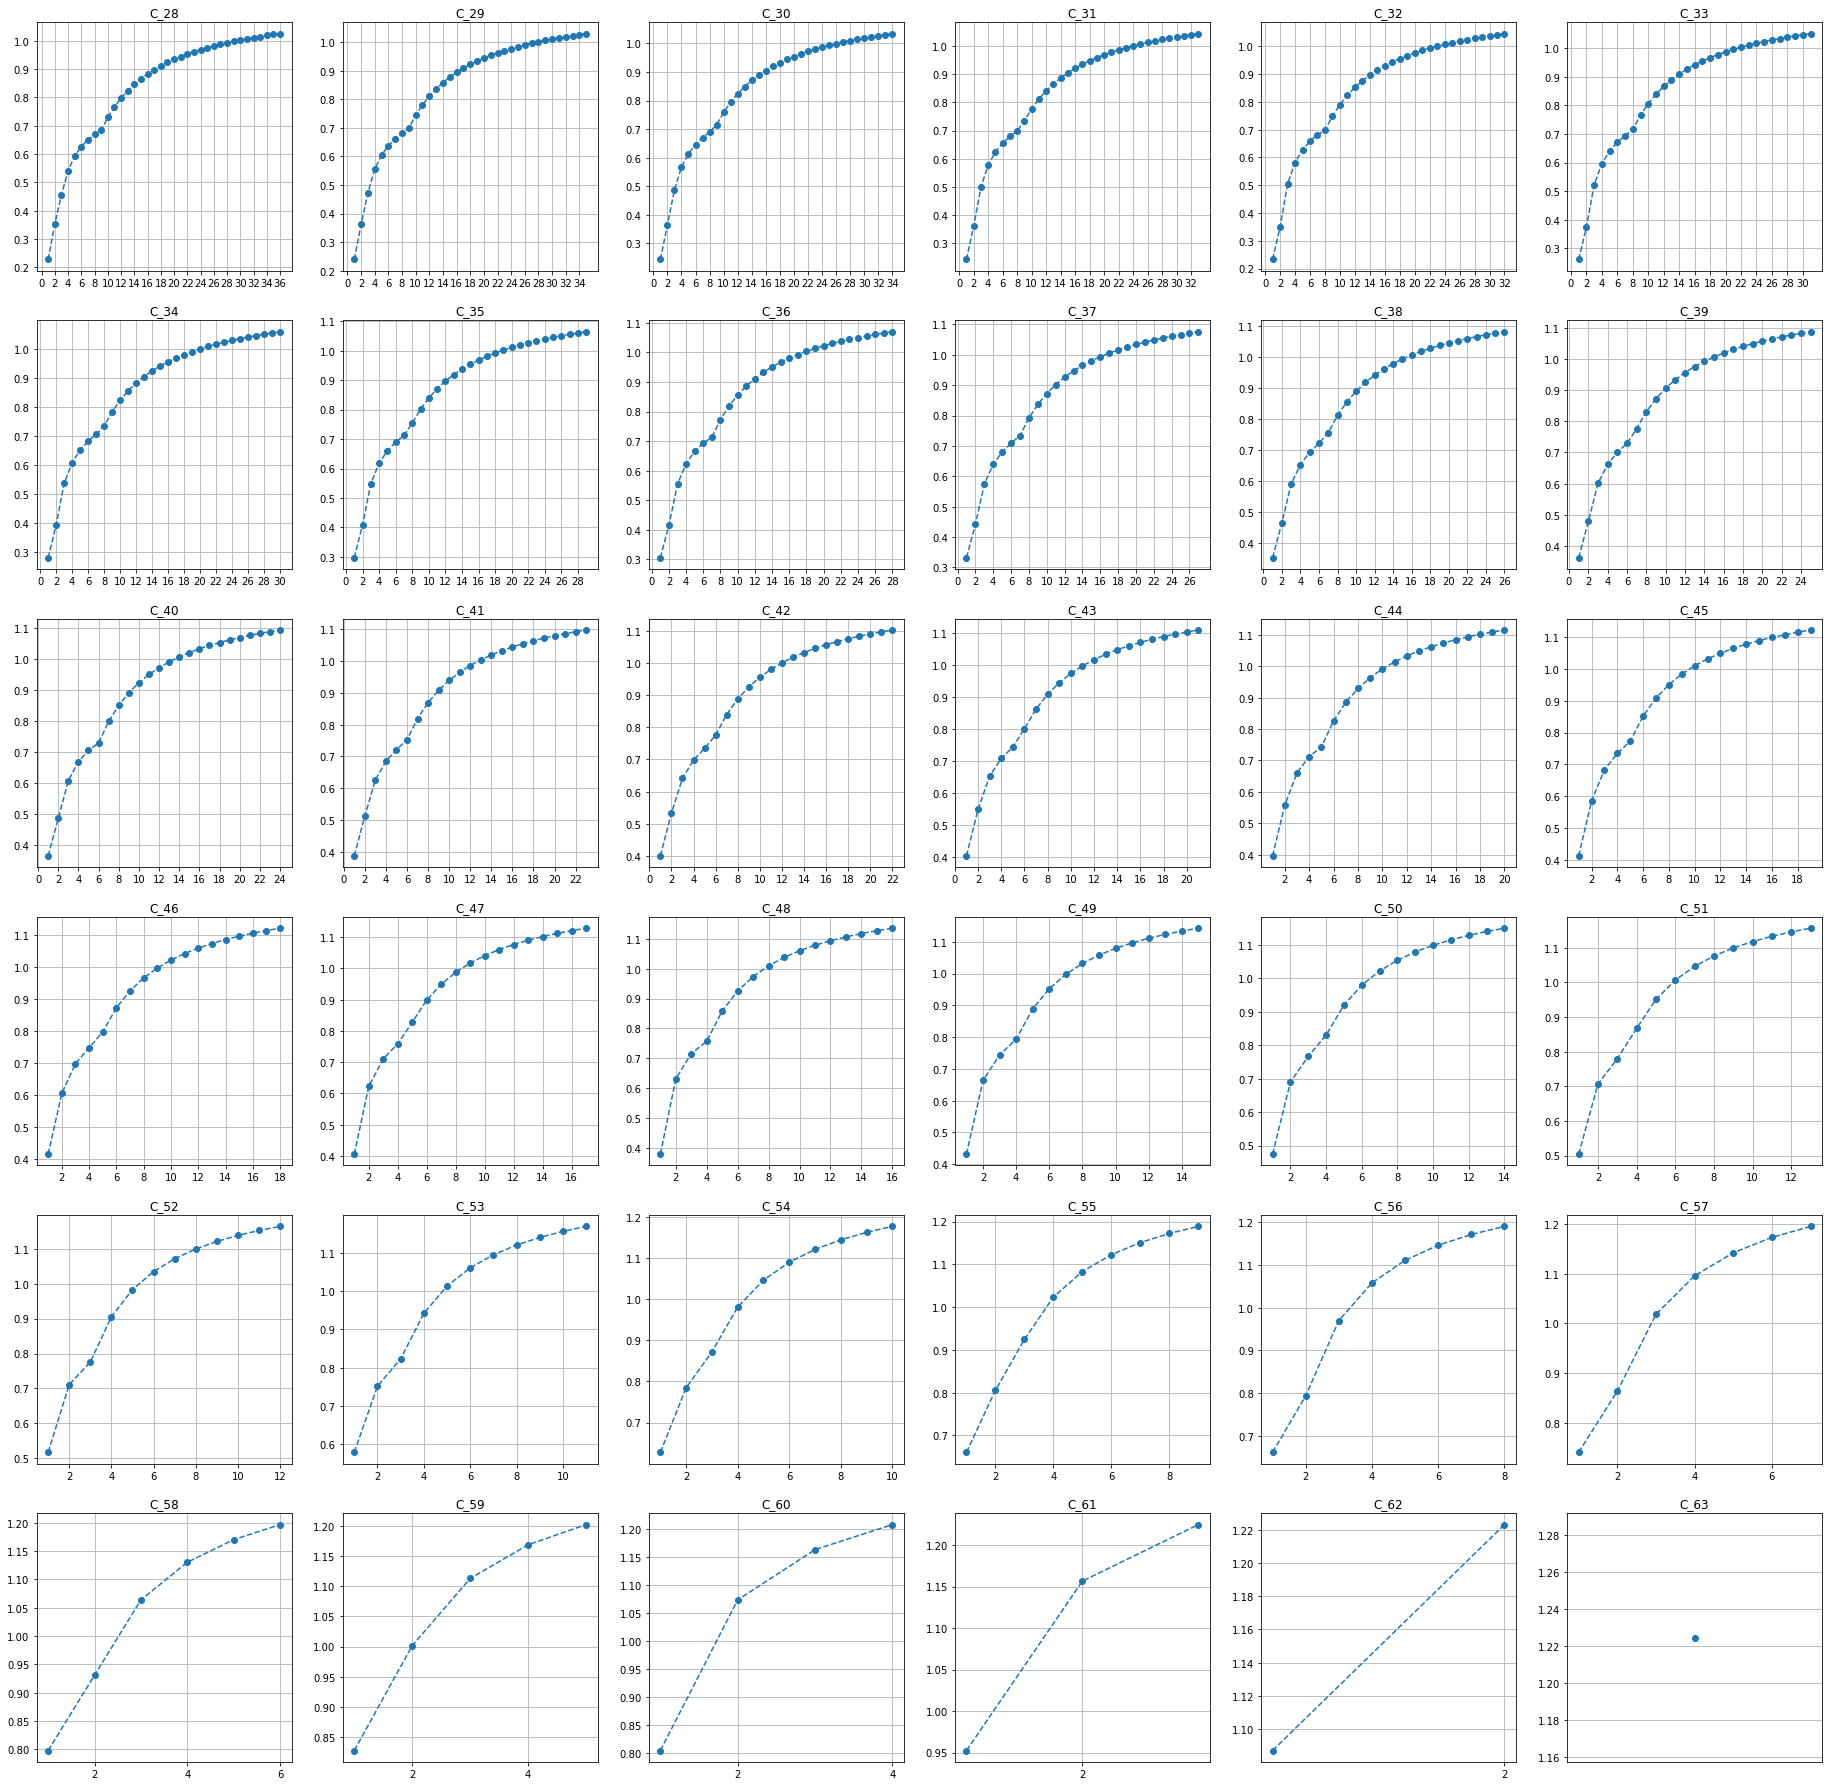

In [17]:
plt.gcf().set_size_inches(32,32)
for k in range(28,64):
    plt.subplot(6,6,k-27)
    oldAvgCond=fun.minAvgCondForCodes(k)
    partitionBal={}
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if n in partitionBal:
            if np.abs(partitionBal[n][0])>np.abs(balance):
                partitionBal[n]=(balance,p)
        else:
            partitionBal[n]=(balance,p)
    plt.title("C_"+str(k))
    plt.grid(True)
    plt.xticks(range(0,65-k,2))
    plt.plot(range(1,65-k),[partitionBal[i][0] for i in range(1,65-k)],'o--')
plt.savefig("../Obrazy/balanceNearZeroForAllCprim.pdf",dpi=1000)
plt.show()

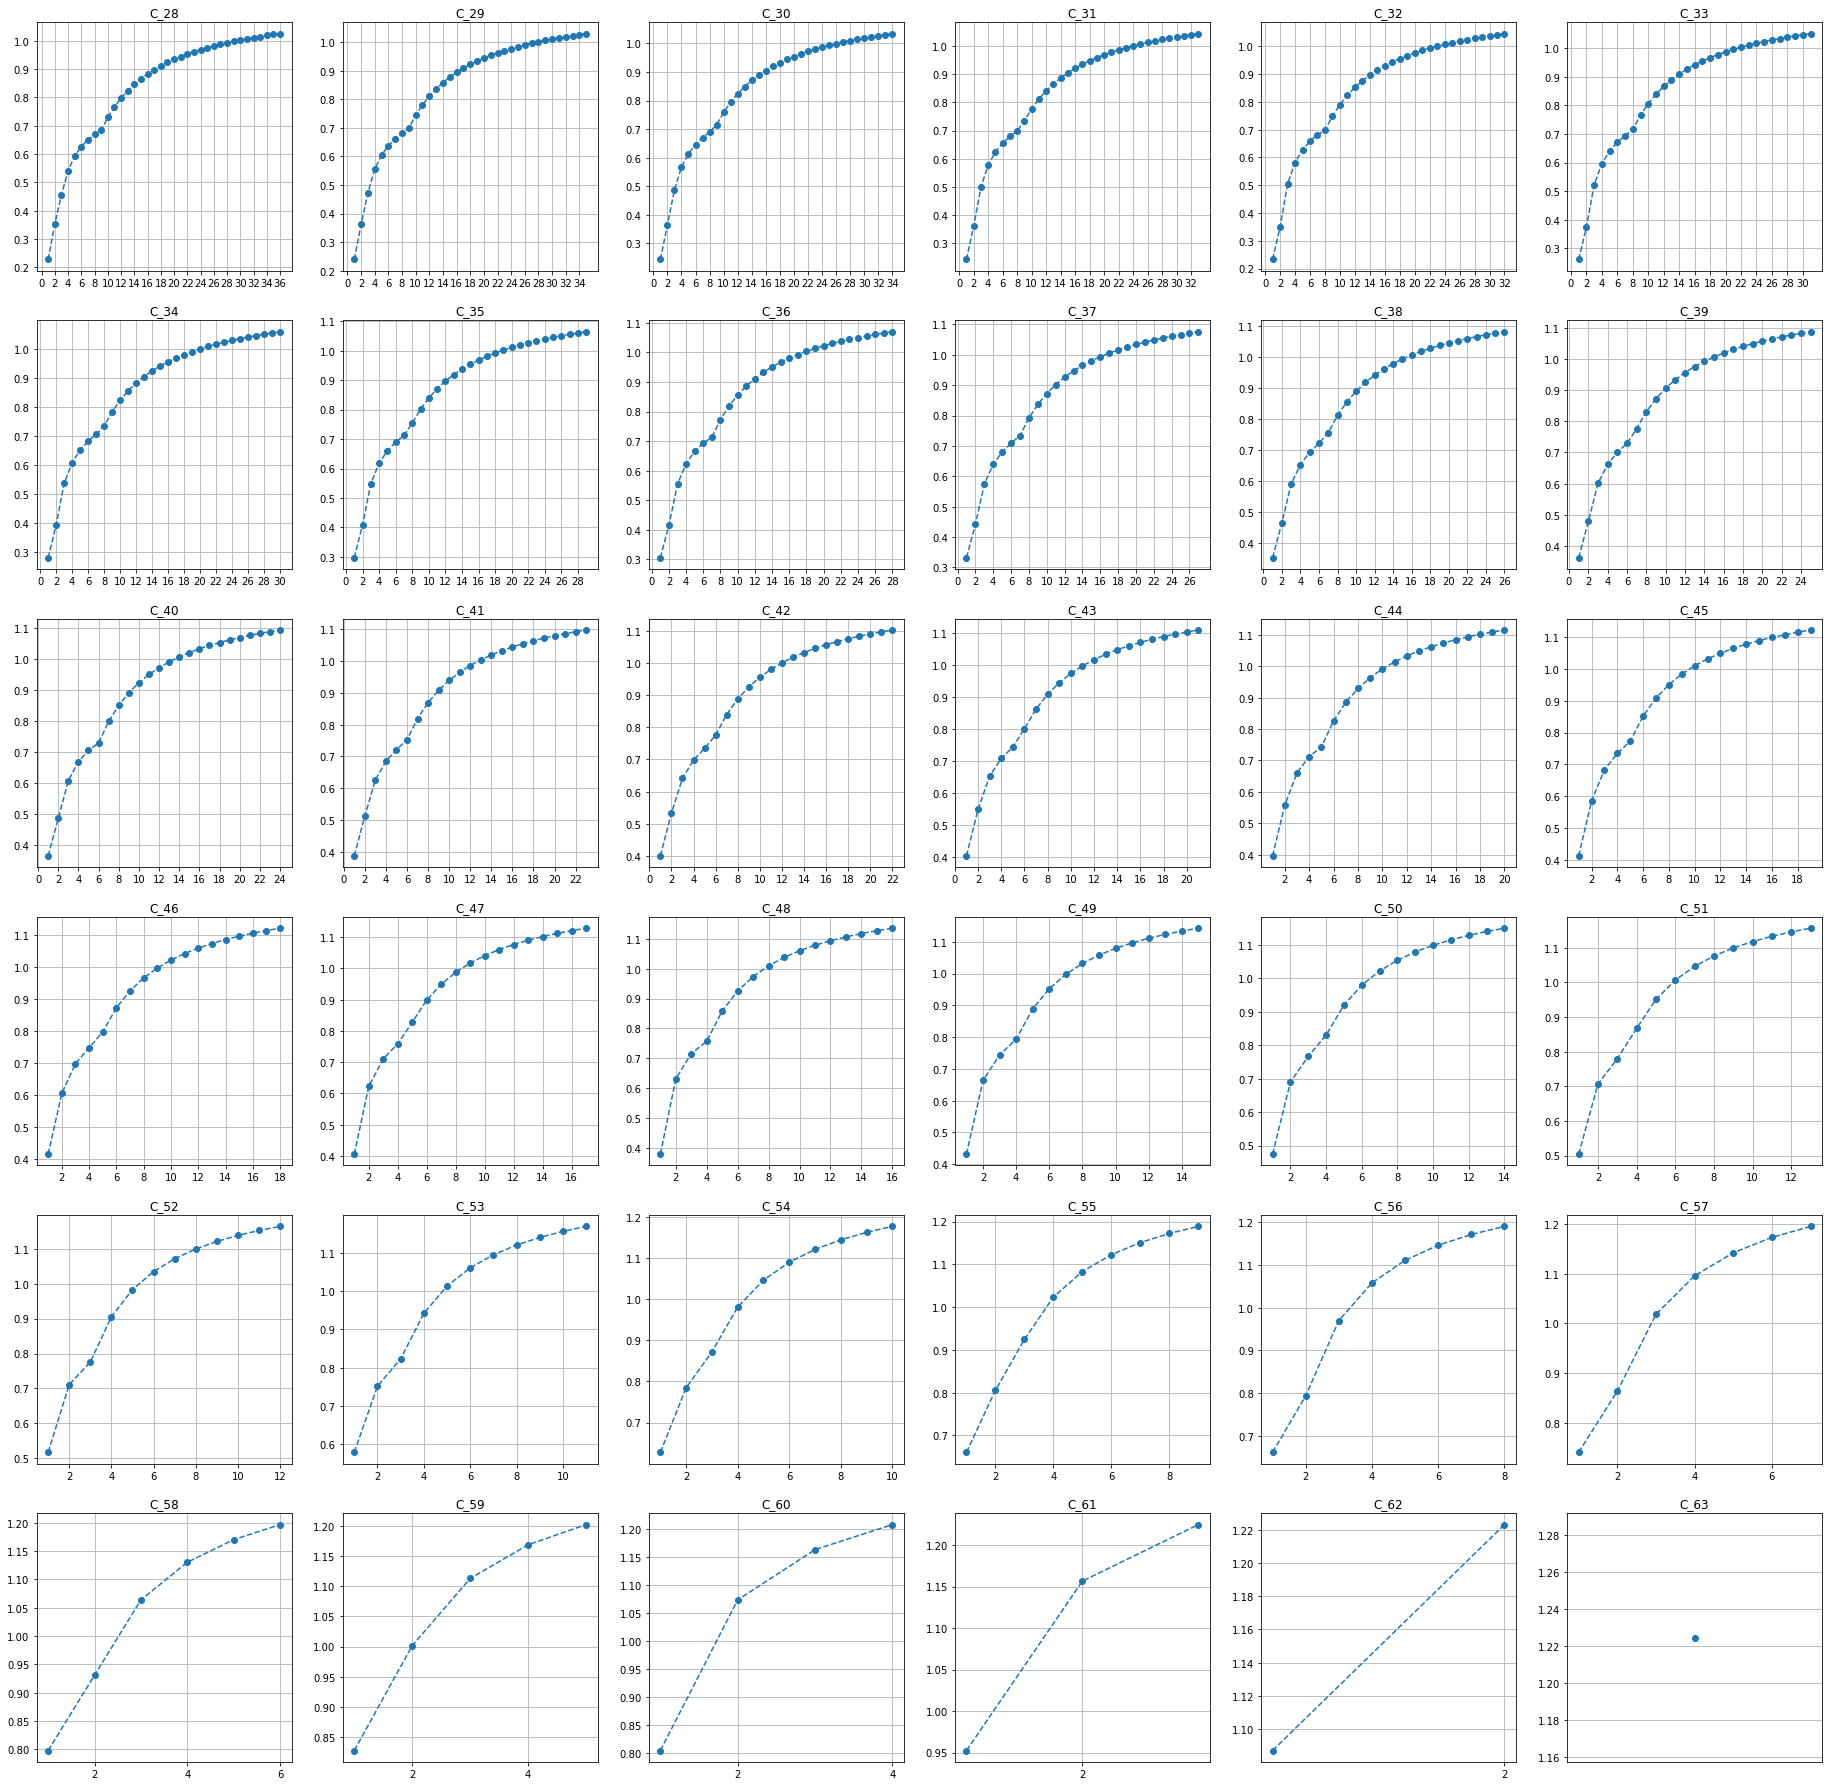

In [18]:
bestCodesGeneretedFromThisFunction={}
plt.gcf().set_size_inches(32,32)
for k in range(28,64):
    plt.subplot(6,6,k-27)
    oldAvgCond, order=fun.minAvgCondForCodes(k, True)
    partitionBal={}
    bestAvgs={}
    bestCodesGeneretedFromThisFunction[k]={}
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if n in partitionBal:
            if bestAvgs[n]>avgCond:
                partitionBal[n]=(balance,p)
                bestAvgs[n]=avgCond 
                bestCodesGeneretedFromThisFunction[k][n]=(balance, order, p)
        else:
            partitionBal[n]=(balance,p)
            bestAvgs[n]=avgCond
            bestCodesGeneretedFromThisFunction[k][n]=(balance, order, p)
       
    plt.title("C_"+str(k))
    plt.grid(True)
    plt.xticks(range(0,65-k,2))
    plt.plot(range(1,65-k),[partitionBal[i][0] for i in range(1,65-k)],'o--')
plt.savefig("../Obrazy/balanceWithBestForAllCprim.pdf",dpi=1000)
plt.show()

In [20]:
postprocess={}
for k in bestCodesGeneretedFromThisFunction:
    slownik=bestCodesGeneretedFromThisFunction[k]
    mostBalanced=None
    bestBlance=1.01
    for n in slownik:
        balance, order,p=slownik[n]
        if abs(bestBlance-1)>abs(balance-1):
            mostBalanced=(balance,order,p)
    if mostBalanced is not None:
        postprocess[k]=mostBalanced

if not os.path.isdir("optymalneKody"):
        os.mkdir("optymalneKody")
for k in postprocess:
    b,order,p=postprocess[k]
    with open("optymalneKody/bestBalancedWithLowerBoundForAvgCond-"+str(k)+'-'+''.join(order[0])+'-'+\
              ''.join(str(i) for i in order[1])+".tex","w") as plik:
        fun.printCode(order[0],order[1],k, file=plik, header=str((b,p)))

## Join plots

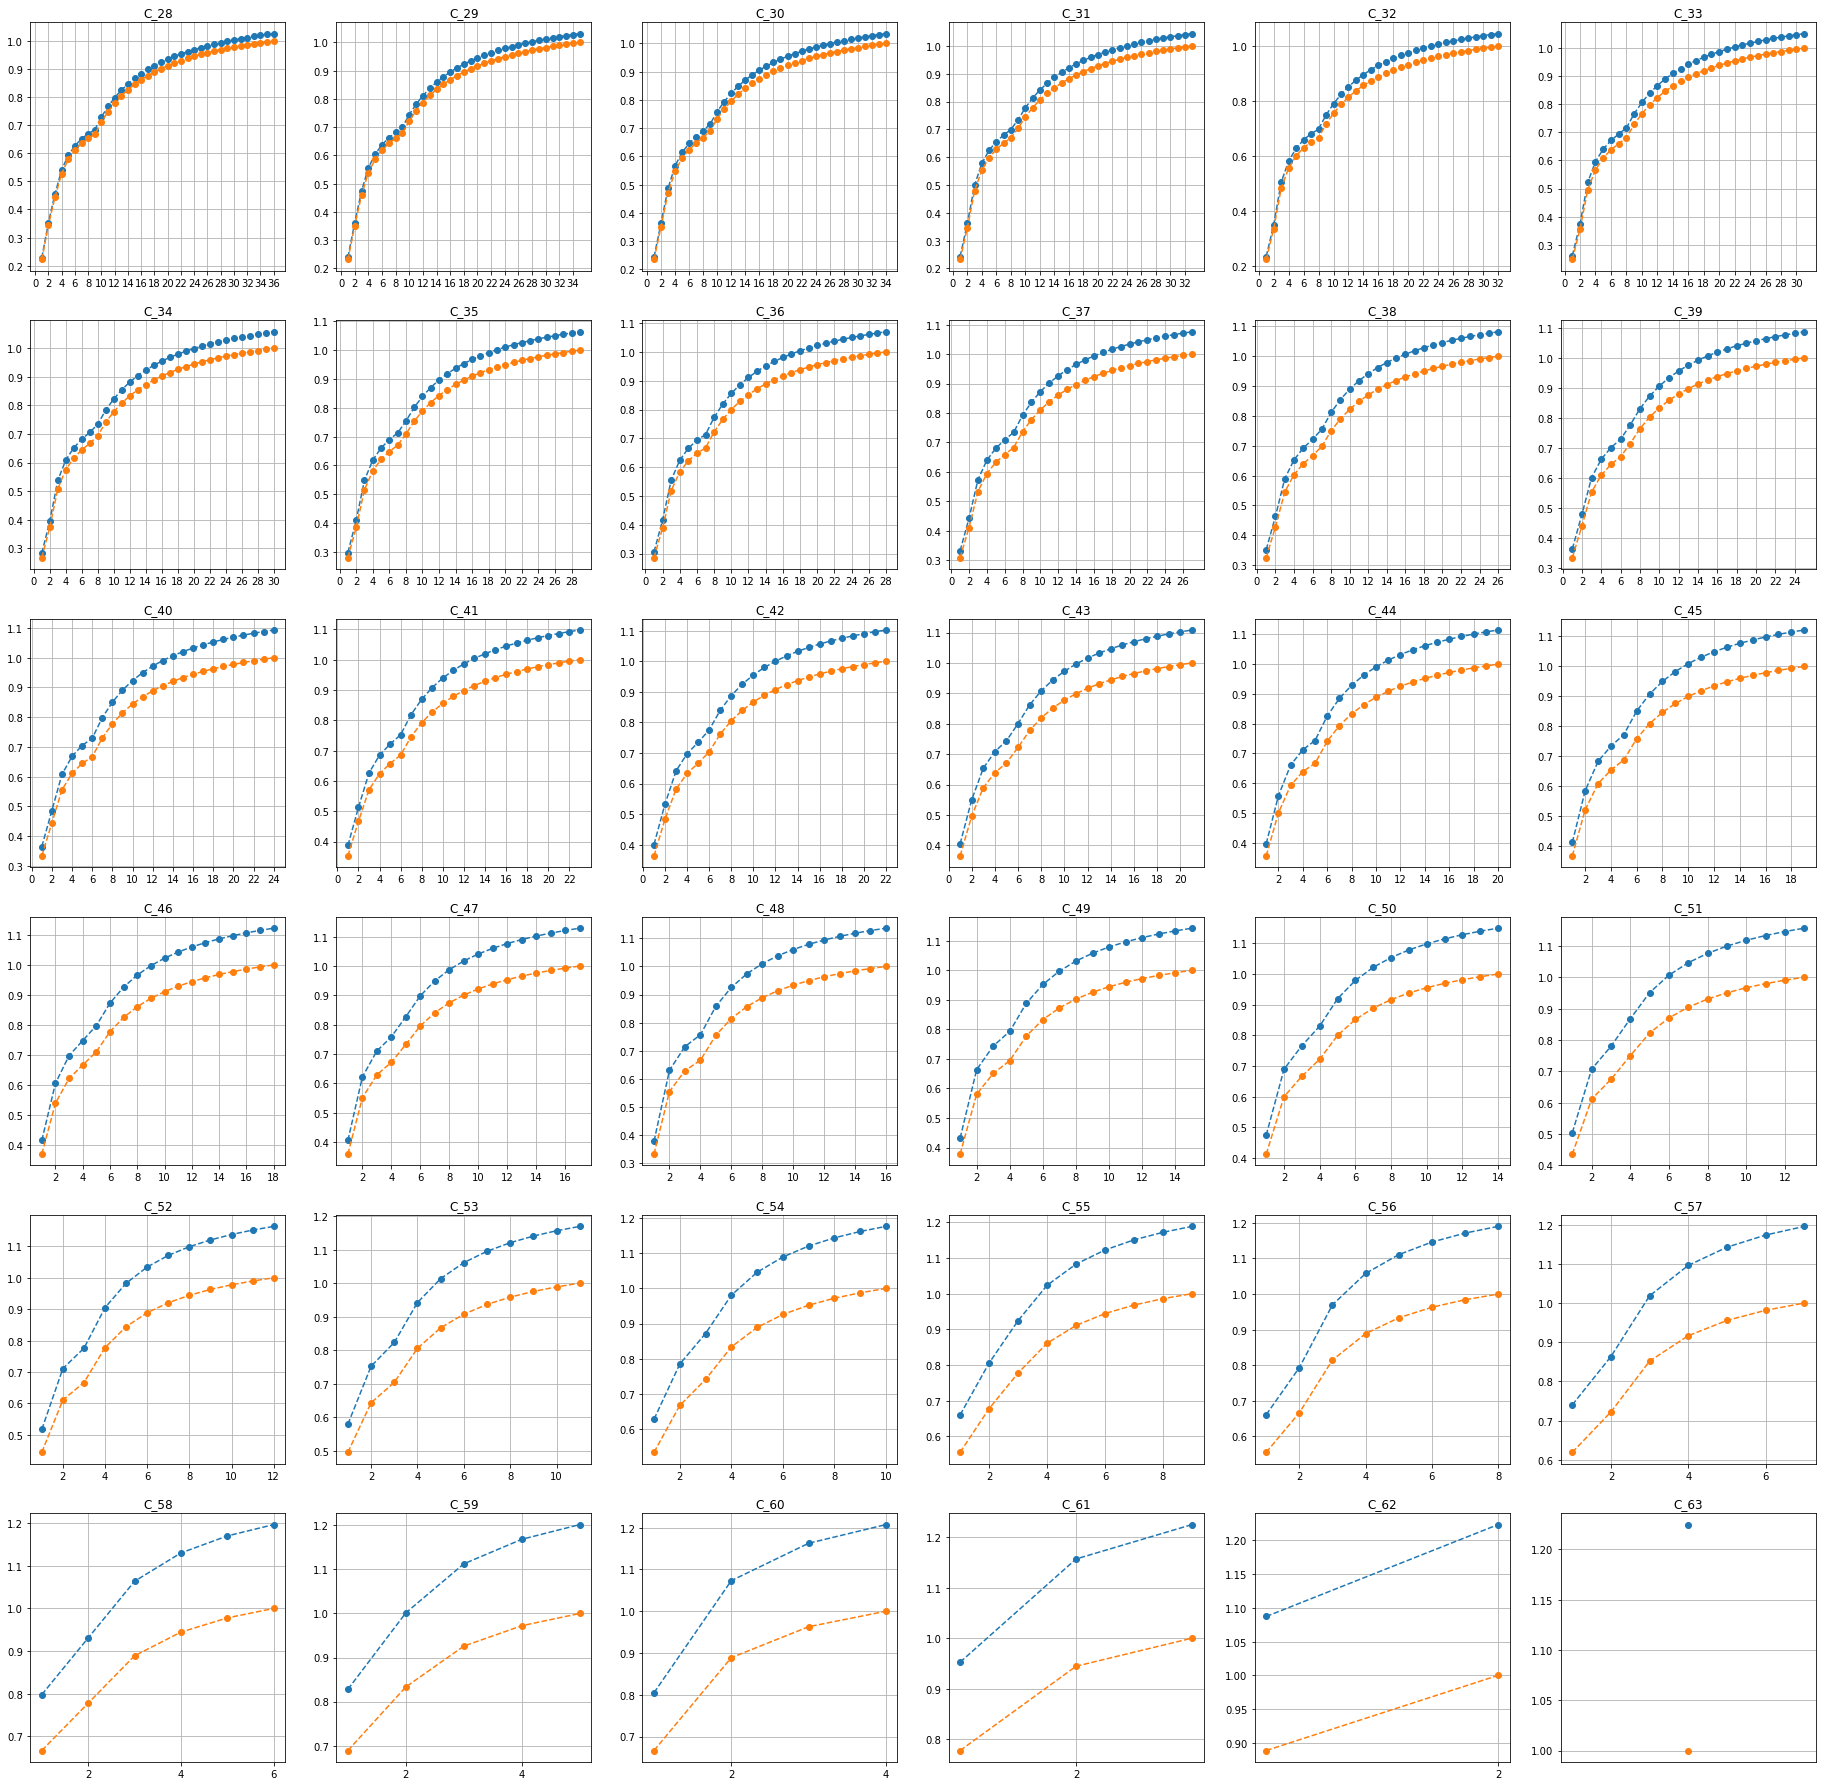

In [19]:
plt.gcf().set_size_inches(32,32)
for k in range(28,64):
    plt.subplot(6,6,k-27)
    oldAvgCond=fun.minAvgCondForCodes(k)
    partitionBal={}
    partition={}
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if n in partition:
            if partition[n][0]>avgCond:
                partition[n]=(avgCond,p)
        else:
            partition[n]=(avgCond,p)
        if n in partitionBal:
            if np.abs(partitionBal[n][0])>np.abs(balance):
                partitionBal[n]=(balance,p)
        else:
            partitionBal[n]=(balance,p)
    plt.title("C_"+str(k))
    plt.grid(True)
    plt.xticks(range(0,65-k,2))
    plt.plot(range(1,65-k),[partitionBal[i][0] for i in range(1,65-k)],'o--')
    plt.plot(range(1,65-k),[partition[i][0] for i in range(1,65-k)],'o--')
plt.savefig("../Obrazy/joinNearForAllCprim.pdf",dpi=1000)
plt.show()

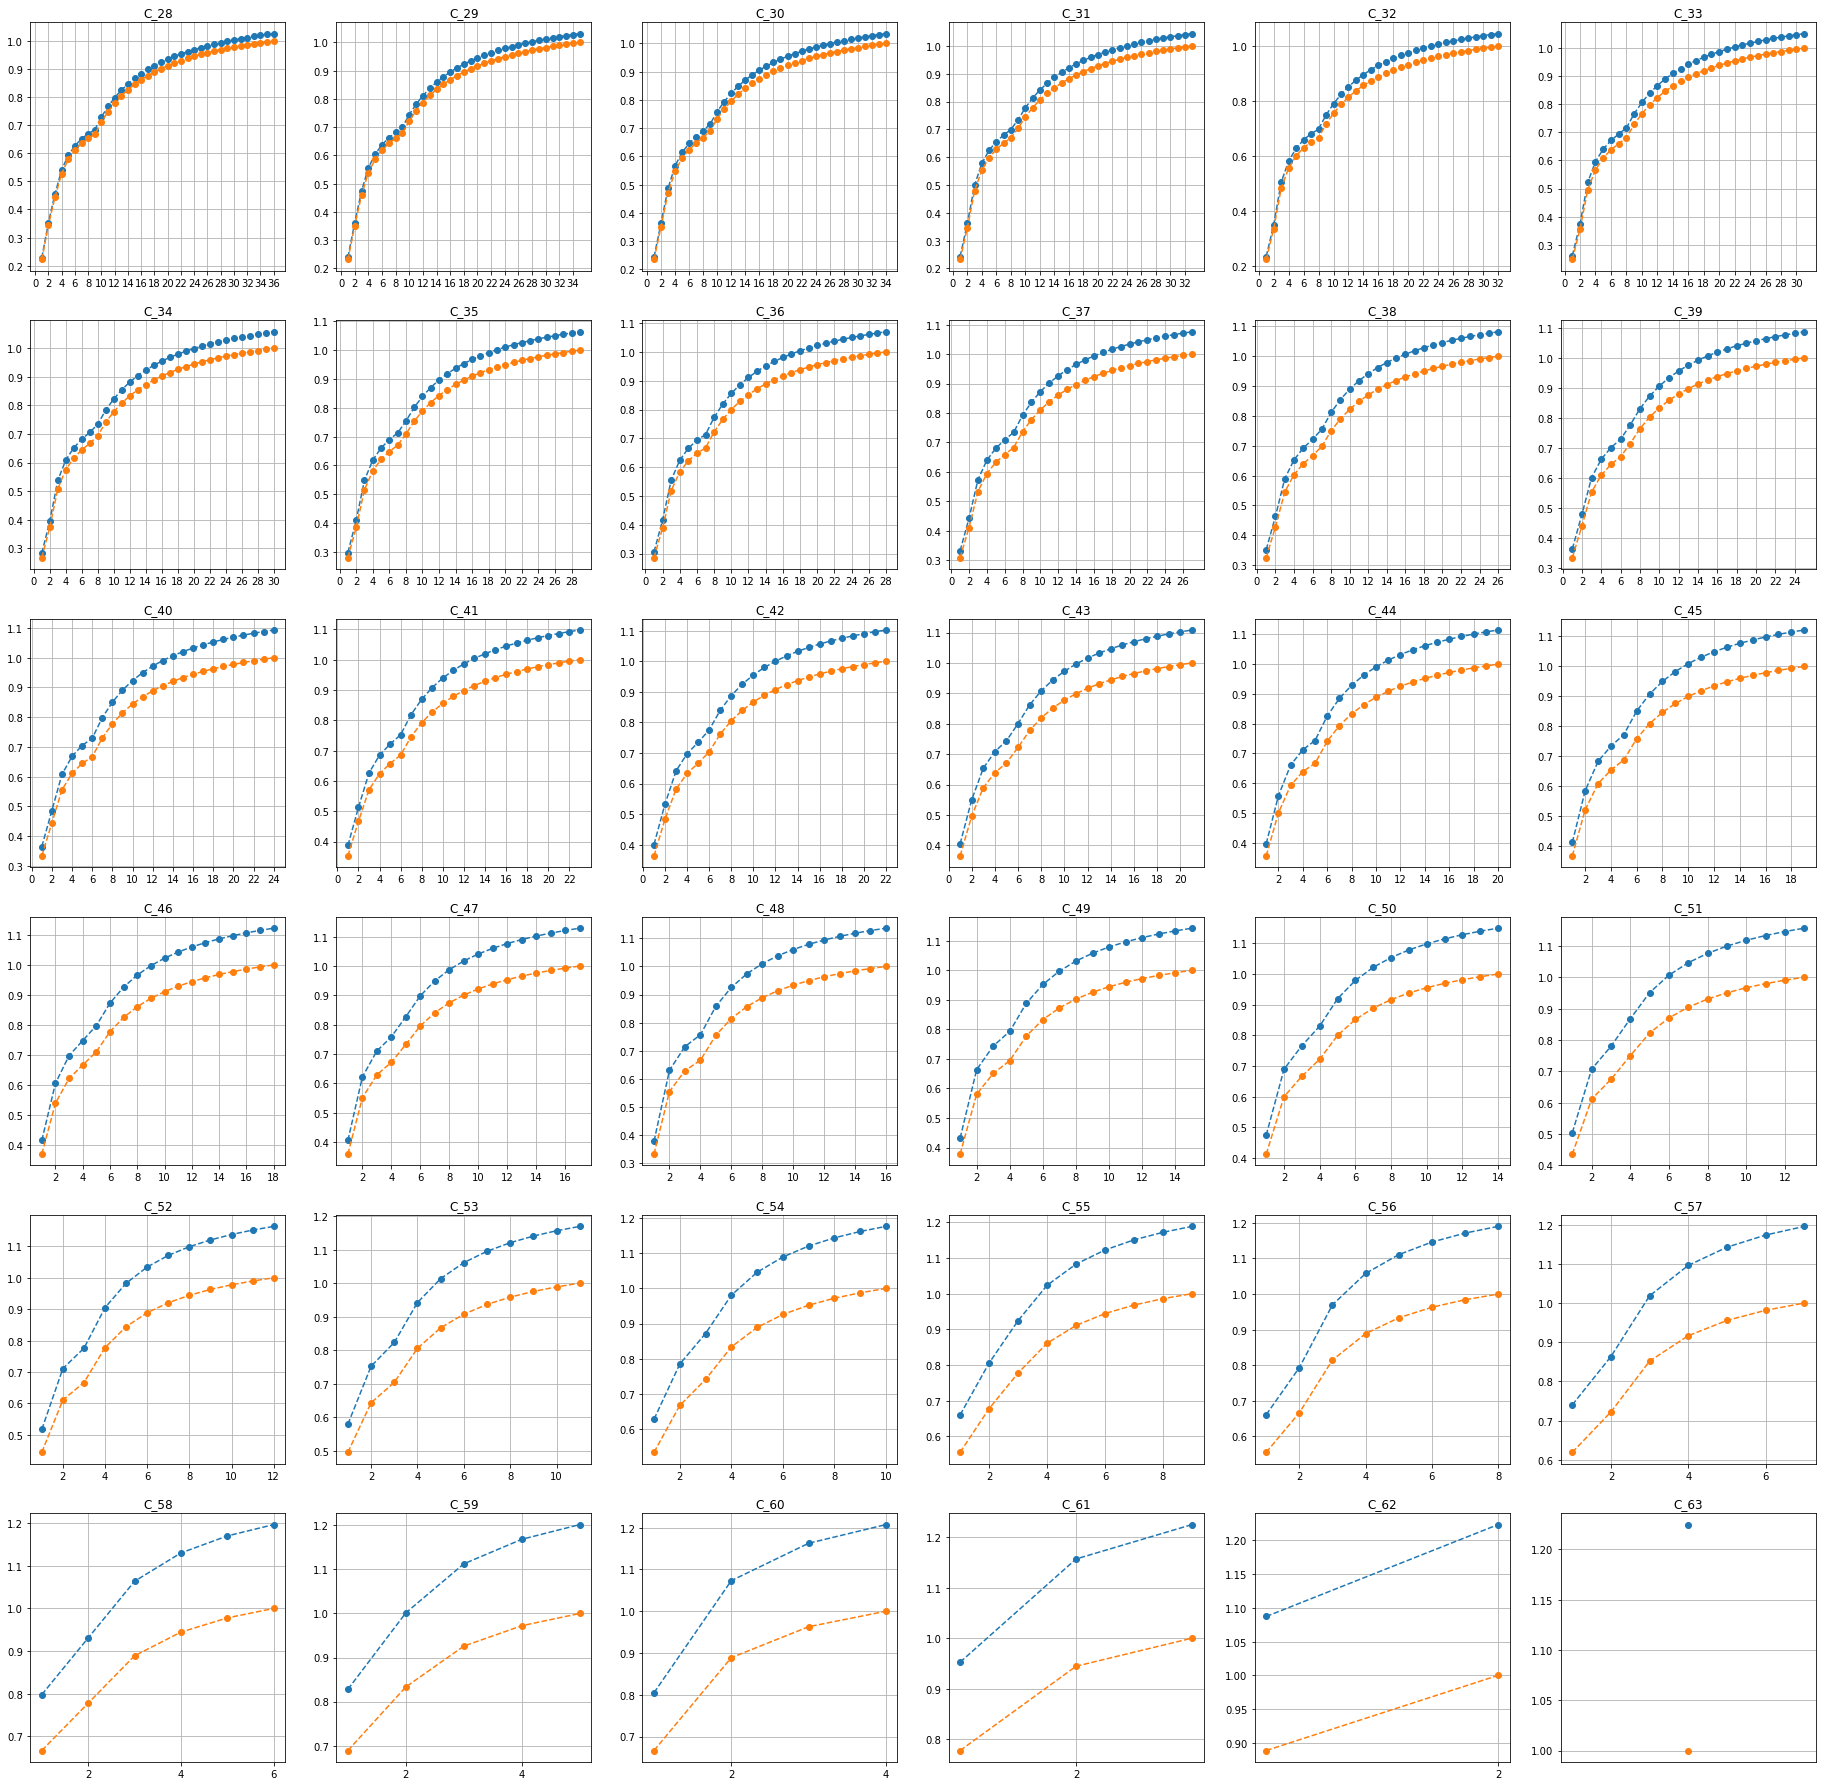

In [20]:
plt.gcf().set_size_inches(32,32)
for k in range(28,64):
    plt.subplot(6,6,k-27)
    oldAvgCond=fun.minAvgCondForCodes(k)
    partitionBal={}
    partition={}
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if n in partition:
            if partition[n][0]>avgCond:
                partition[n]=(avgCond,p)
                partitionBal[n]=(balance,p)
        else:
            partition[n]=(avgCond,p)
            partitionBal[n]=(balance,p)
    plt.title("C_"+str(k))
    plt.grid(True)
    plt.xticks(range(0,65-k,2))
    plt.plot(range(1,65-k),[partitionBal[i][0] for i in range(1,65-k)],'o--')
    plt.plot(range(1,65-k),[partition[i][0] for i in range(1,65-k)],'o--')
plt.savefig("../Obrazy/joinBestForAllCprim.pdf",dpi=1000)
plt.show()

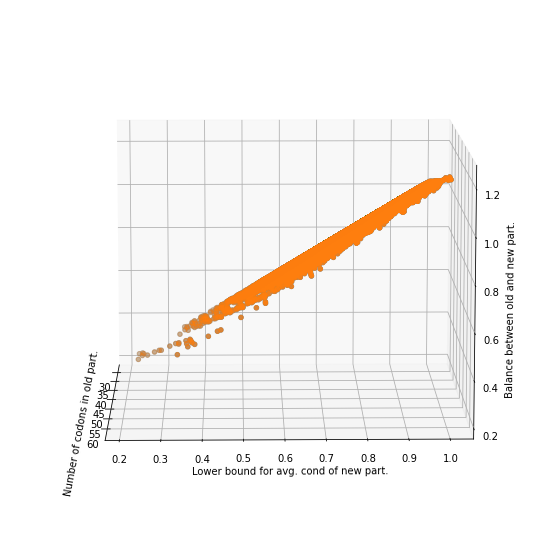

In [24]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
def init_3dplot_avg_cond_x_balance_x_codons():
    plotDataAA=[]
    plotDataBal=[]
    plotDataCond=[]
    for k in range(28,64):
        oldAvgCond=fun.minAvgCondForCodes(k)
        for p in partitions(64-k):
            sumOfCond=0
            n=len(p)
            for K in p:
                sumOfCond+=kSizeCond[K]
            avgCond=sumOfCond/n
            balance=fun.balance(oldAvgCond, avgCond)
            plotDataAA.append(k)
            plotDataBal.append(balance)
            plotDataCond.append(avgCond)
    ax.scatter(plotDataAA, plotDataCond, plotDataBal)
    ax.set_xlabel("Number of codons in old part.")
    ax.set_ylabel("Lower bound for avg. cond of new part.")
    ax.set_zlabel("Balance between old and new part.")
    return fig,

def animate_3dplot_avg_cond_x_balance_x_codons(i):
    ax.view_init(elev=10., azim=(i%360))
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate_3dplot_avg_cond_x_balance_x_codons, init_func=init_3dplot_avg_cond_x_balance_x_codons,
                               frames=720, interval=50, blit=True)
# Save
anim.save('../Obrazy/3dplot-avg_cond-x-balance-x-codons.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

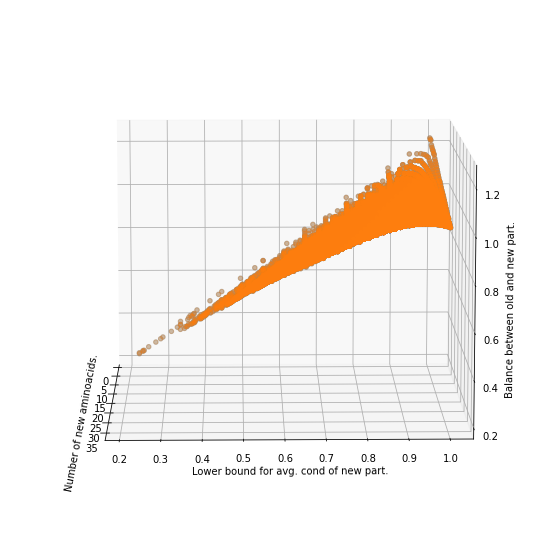

In [25]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
def init_3dplot_avg_cond_x_balance_x_aa():
    plotDataAA=[]
    plotDataBal=[]
    plotDataCond=[]
    for k in range(28,64):
        oldAvgCond=fun.minAvgCondForCodes(k)
        for p in partitions(64-k):
            sumOfCond=0
            n=len(p)
            for K in p:
                sumOfCond+=kSizeCond[K]
            avgCond=sumOfCond/n
            balance=fun.balance(oldAvgCond, avgCond)
            plotDataAA.append(n)
            plotDataBal.append(balance)
            plotDataCond.append(avgCond)
    ax.scatter(plotDataAA, plotDataCond, plotDataBal)
    ax.set_xlabel("Number of new aminoacids.")
    ax.set_ylabel("Lower bound for avg. cond of new part.")
    ax.set_zlabel("Balance between old and new part.")
    return fig,

def animate_3dplot_avg_cond_x_balance_x_aa(i):
    ax.view_init(elev=10., azim=(i%360))
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate_3dplot_avg_cond_x_balance_x_aa, init_func=init_3dplot_avg_cond_x_balance_x_aa,
                               frames=720, interval=50, blit=True)
# Save
anim.save('../Obrazy/3dplot-avg_cond-x-balance-x-aa.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

### Plots with plane at Balance~1

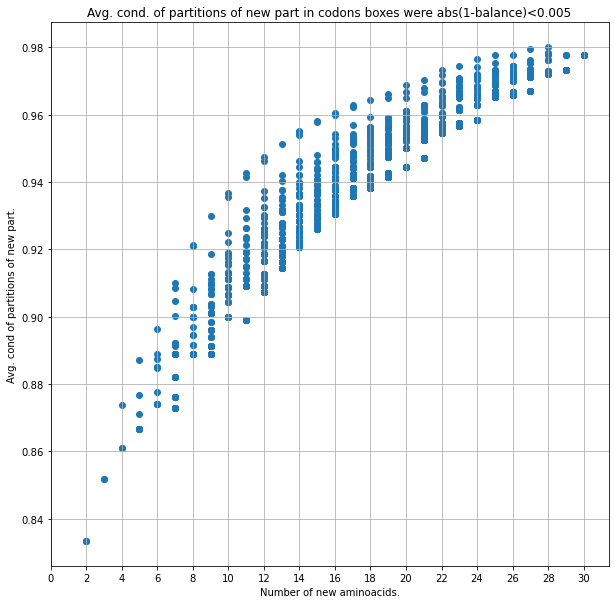

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure()
fig.set_size_inches(10,10)

plotDataAA=[]
plotDataCond=[]
for k in range(28,64):
    oldAvgCond=fun.minAvgCondForCodes(k)
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if abs(1-balance)<0.005:
            plotDataAA.append(n)
            plotDataCond.append(avgCond)
plt.scatter(plotDataAA, plotDataCond)
plt.xlabel("Number of new aminoacids.")
plt.ylabel("Avg. cond of partitions of new part.")
plt.xticks(range(0,31,2))
plt.title("Avg. cond. of partitions of new part in codons boxes were abs(1-balance)<0.005")
plt.grid()
plt.show()
plt.savefig("../Obrazy/avg-cond-of-new-part-partitions-with-abs(1-balance)<0,005-new-aa.pdf",dpi=1000)

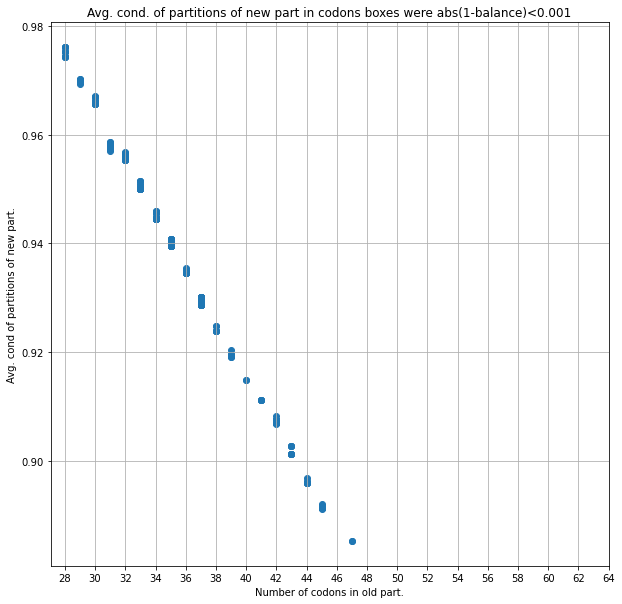

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure()
fig.set_size_inches(10,10)

plotDataAA=[]
plotDataCond=[]
for k in range(28,64):
    oldAvgCond=fun.minAvgCondForCodes(k)
    for p in partitions(64-k):
        sumOfCond=0
        n=len(p)
        for K in p:
            sumOfCond+=kSizeCond[K]
        avgCond=sumOfCond/n
        balance=fun.balance(oldAvgCond, avgCond)
        if abs(1-balance)<0.001:
            plotDataAA.append(k)
            plotDataCond.append(avgCond)
plt.scatter(plotDataAA, plotDataCond)
plt.xlabel("Number of codons in old part.")
plt.ylabel("Avg. cond of partitions of new part.")
plt.xticks(range(28,65,2))
plt.title("Avg. cond. of partitions of new part in codons boxes were abs(1-balance)<0.001")
plt.grid()
plt.show()
plt.savefig("../Obrazy/avg-cond-of-new-part-partitions-with-abs(1-balance)<0,001-old-codons.pdf",dpi=1000)

### PCA of 3D plots

###### aa in new part

In [28]:
def generate3Ddata(aa=True):
    plotDataAA=[]
    plotDataBal=[]
    plotDataCond=[]
    for k in range(28,64):
        oldAvgCond=fun.minAvgCondForCodes(k)
        for p in partitions(64-k):
            sumOfCond=0
            n=len(p)
            for K in p:
                sumOfCond+=kSizeCond[K]
            avgCond=sumOfCond/n
            balance=fun.balance(oldAvgCond, avgCond)
            if aa:
                plotDataAA.append(n)
            else:
                plotDataAA.append(k)
            plotDataBal.append(balance)
            plotDataCond.append(avgCond)
    return (plotDataAA,plotDataBal, plotDataCond)

In [29]:
plotDataAA,plotDataBal, plotDataCond=generate3Ddata()

data_nrOld_Bal_AvgCond=np.array((plotDataAA,plotDataBal,plotDataCond))

pcaModel=PCA(n_components=2, whiten=True)
pcaModel.fit(data_nrOld_Bal_AvgCond.T)

pcaModel.components_

array([[ 0.99972,  0.01669,  0.01699],
       [ 0.02358, -0.79339, -0.60826]])

###### Codons in old part

In [30]:
plotDataAA,plotDataBal, plotDataCond=generate3Ddata(aa=False)

data_nrOld_Bal_AvgCond=np.array((plotDataAA,plotDataBal,plotDataCond))

pcaModel=PCA(n_components=2, whiten=True)
pcaModel.fit(data_nrOld_Bal_AvgCond.T)

pcaModel.components_

array([[ 0.99998,  0.00613,  0.00144],
       [ 0.00543, -0.72406, -0.68972]])